In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
Data=pd.read_excel('/content/drive/My Drive/Task_1.xlsx')

In [5]:
Data.head()

,Index,Quarter,Ranstin,Swingate,Ulm,Bridgeport
0,0,1,36,97,48,25
1,1,2,25,78,35,27
2,2,3,48,78,69,36
3,3,4,52,105,61,40
4,4,5,39,83,76,42


In [6]:
data_sma=Data[['Quarter','Ranstin']]
data_sma.head()


,Quarter,Ranstin
0,1,36
1,2,25
2,3,48
3,4,52
4,5,39


**SMA**

In [7]:
for i in range(0,data_sma.shape[0]-2):
    data_sma.loc[data_sma.index[i+2],'SMA_3'] = np.round(((data_sma.iloc[i,1]+ data_sma.iloc[i+1,1] +data_sma.iloc[i+2,1])/3),1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
data_sma.head()

,Quarter,Ranstin,SMA_3
0,1,36,NaN
1,2,25,NaN
2,3,48,36.3
3,4,52,41.7
4,5,39,46.3


In [9]:
data_sma['Output_SMA_5'] = data_sma.iloc[:,1].rolling(window=5).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_sma.head()

,Quarter,Ranstin,SMA_3,Output_SMA_5
0,1,36,NaN,NaN
1,2,25,NaN,NaN
2,3,48,36.3,NaN
3,4,52,41.7,NaN
4,5,39,46.3,40.0


In [11]:
data_sma

,Quarter,Ranstin,SMA_3,Output_SMA_5
0,1,36,NaN,NaN
1,2,25,NaN,NaN
2,3,48,36.3,NaN
3,4,52,41.7,NaN
4,5,39,46.3,40.0
5,6,60,50.3,44.8
6,7,48,49.0,49.4
7,8,75,61.0,54.8
8,9,5,42.7,45.4
9,10,17,32.3,41.0


In [12]:
#12th week for 3 window =94
#12 th week for 4 window =42.9375
#12th week for 5 window=45.32

In [13]:
data_exp = pd.concat([Data, pd.DataFrame([[np.nan] * Data.shape[1]], columns=Data.columns)], ignore_index=True)
Data.head()

,Index,Quarter,Ranstin,Swingate,Ulm,Bridgeport
0,0,1,36,97,48,25
1,1,2,25,78,35,27
2,2,3,48,78,69,36
3,3,4,52,105,61,40
4,4,5,39,83,76,42


In [14]:
data_exp.Quarter[11]=12

In [15]:
data_exp

,Index,Quarter,Ranstin,Swingate,Ulm,Bridgeport
0,0.0,1.0,36.0,97.0,48.0,25.0
1,1.0,2.0,25.0,78.0,35.0,27.0
2,2.0,3.0,48.0,78.0,69.0,36.0
3,3.0,4.0,52.0,105.0,61.0,40.0
4,4.0,5.0,39.0,83.0,76.0,42.0
5,5.0,6.0,60.0,58.0,39.0,48.0
6,6.0,7.0,48.0,65.0,48.0,45.0
7,7.0,8.0,75.0,89.0,22.0,63.0
8,8.0,9.0,5.0,73.0,32.0,74.0
9,9.0,10.0,17.0,65.0,85.0,85.0


In [16]:
def simple_exp_smooth(d,extra_periods=1,alpha=0.4):  

  d = np.array(d)  ## Transform the input into a numpy array  
  cols = len(d)  ## Historical period length  
  d = np.append(d,[np.nan]*extra_periods)  ## Append np.nan into the demand array to cover future periods  
  f = np.full(cols+extra_periods,np.nan)  ## Forecast array  
  f[1] = d[0]  ## initialization of first forecast  
  ## Create all the t+1 forecasts until end of historical period  
  for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
  f[cols+1:] = f[t]  ## Forecast for all extra periods  
  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":d-f})
  return df
  


In [17]:


for i in np.arange(0.1,0.4,0.05):
  forecast=simple_exp_smooth(data_exp.Swingate,extra_periods=1,alpha=i)
  print(forecast.Forecast[11])
  





84.57500249190001
81.58671615173154
79.86543554559998
78.9981336593628
78.70233630310001
78.78706009280576
79.1249286144


In [18]:
forecast.Forecast[11]

79.1249286144

In [19]:

for i in np.arange(0.1,0.4,0.05):
  forecast=simple_exp_smooth(data_exp.Ulm,extra_periods=1,alpha=i)
  print(forecast.Forecast[11])

51.217314275300005
52.255255724519245
53.18871889919999
54.1226167678833
55.104047765699995
56.13904218433565
57.2064616448


In [20]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.21)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 438, in run
    self._warn_about_conflicts(to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 568, in _warn_about_conflicts
    pac

/bin/bash: conda: command not found


In [21]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [32]:
data_exp_1=data_exp.Bridgeport


In [36]:
data_exp_1.drop(data_exp_1.tail(1).index,inplace=True)

In [37]:
data_exp_1

0     25.0
1     27.0
2     36.0
3     40.0
4     42.0
5     48.0
6     45.0
7     63.0
8     74.0
9     85.0
10    89.0
Name: Bridgeport, dtype: float64

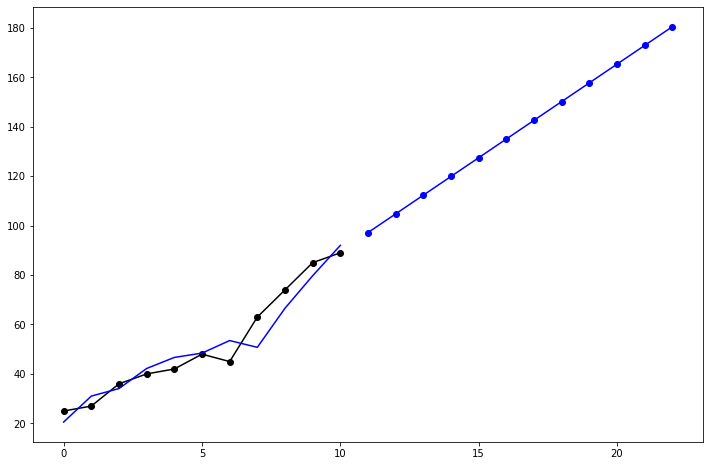

In [38]:
fit1 = Holt(data_exp_1, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")


plt.figure(figsize=(12, 8))
plt.plot(data_exp_1, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')

#plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


In [39]:
fcast1

11     97.170284
12    104.741697
13    112.313110
14    119.884524
15    127.455937
16    135.027350
17    142.598764
18    150.170177
19    157.741590
20    165.313004
21    172.884417
22    180.455831
Name: Holt's linear trend, dtype: float64

In [31]:
fit1